In [72]:
import numpy as np
from PIL import Image
import math
import random
# Define width and height



with open('./outputs/local_enc_small_TM', mode='r') as f:
    r = f.read()
    print("Balance: {}%".format(r.count("1")/len(r)))
    w, h = int(math.sqrt(len(r))), int(math.sqrt(len(r)))
    d = np.array([int(c)*255 for c in r[:w*h] if c in ["0", "1"]], dtype=np.uint8).reshape(h,w)


# Make into PIL Image and save
PILimage = Image.fromarray(d)
name = 'outputs/tmp.png'
PILimage.save(name)

print("Compression ratio: {}%".format((os.path.getsize(name)*8)/(w*h)))

Balance: 0.492702%
Compression ratio: 1.677144%


In [70]:
# png from bytes

import numpy as np
import os
from PIL import Image
import math
import random
# Define width and height


with open('./outputs/local_enc_small_TM', mode='r') as f:
    r = f.read()
    # r = [str(random.randint(0, 1)) for c in r]
    print("Balance: {}%".format(r.count("1")/len(r)))
    arr_bytes = []
    for i in range(0, len(r), 8):
        arr_bytes.append(0)
        for j in r[i: i+8]:
            arr_bytes[i//8] = (arr_bytes[i//8] << 1) + int(j)
    r = arr_bytes
    w, h = int(math.sqrt(len(r))), int(math.sqrt(len(r)))
    d = np.array(r[:w*h], dtype=np.uint8).reshape(h,w)


# Make into PIL Image and save
PILimage = Image.fromarray(d)
name = 'outputs/tmp.png'
PILimage.save(name)

print("Compression ratio: {}%".format((os.path.getsize(name))/(w*h)))

Balance: 0.492702%
Compression ratio: 1.0041409529006733%


100%|██████████| 10/10 [00:03<00:00,  2.63it/s]


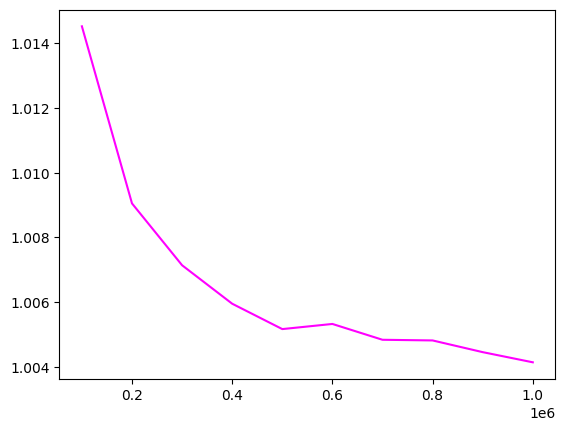

In [71]:
# graph: compression ratio as function of output length

import numpy as np
from PIL import Image
import math
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

with open('./outputs/local_enc_small_TM', mode='r') as f:
    data = f.read()

increment = 100000 # bits
sizes = [i * increment for i in range(1, 1 + len(data) // increment)]
compressed = []

for size in tqdm(sizes):
    r = data
    arr_bytes = []
    for i in range(0, len(r), 8):
        arr_bytes.append(0)
        for j in r[i: i+8]:
            arr_bytes[i//8] = (arr_bytes[i//8] << 1) + int(j)
    r = arr_bytes[:size//8]

    # w, h = increment, len(r)//increment#int(math.sqrt(len(r))), int(math.sqrt(len(r)))
    w, h = int(math.sqrt(len(r))), int(math.sqrt(len(r)))
    d = np.array(r[:w*h], dtype=np.uint8).reshape(h,w)
    PILimage = Image.fromarray(d)
    PILimage.save('./outputs/tmp.png')
    compressed.append(os.path.getsize("./outputs/tmp.png")/(w*h))

plt.plot(sizes, compressed, color="magenta")
# plt.plot(sizes,sizes, color="black")
plt.show()
plt.close()

100%|██████████| 8/8 [00:01<00:00,  6.95it/s]


[0.6241924740588561, 1.0047616582992598, 1.0047616582992598, 1.0042829046115624, 1.0048134154546866, 1.0045287510998395, 1.0047616582992598, 1.004554629677553]


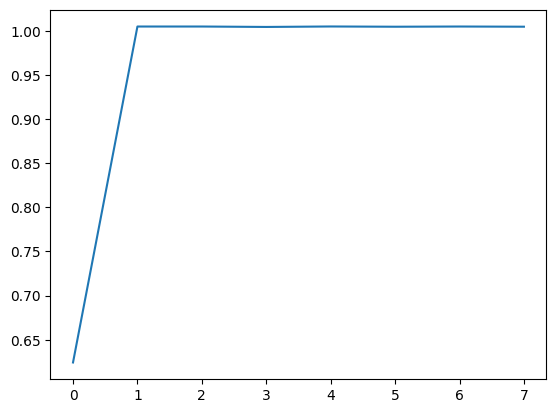

In [57]:
# iterative compression
from bitstring import BitArray

with open('./outputs/output.txt', mode='r') as f:
    r = f.read()


compressed = []

for i in tqdm(range(8)):
    arr_bytes = []
    for i in range(0, len(r), 8):
        arr_bytes.append(0)
        for j in r[i: i+8]:
            arr_bytes[i//8] = (arr_bytes[i//8] << 1) + int(j)
    r = arr_bytes
    w, h = int(math.sqrt(len(r))), int(math.sqrt(len(r)))
    d = np.array(r[:w*h], dtype=np.uint8).reshape(h,w)

    PILimage = Image.fromarray(d)
    PILimage.save('./outputs/tmp.png')
    compressed.append(os.path.getsize("./outputs/tmp.png")/(w*h))

    with open("./outputs/tmp.png", "rb") as fp:
        data = fp.read()
        r = BitArray(data).bin
    
    # assert len(r) == compressed[-1]

print(compressed)
plt.plot(compressed)
plt.show()



In [ ]:
# cyclic application 